<a href="https://colab.research.google.com/github/roshantac/EVA4/blob/master/Assignment15/B/endgame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!!nvidia-smi

['Sun May 24 15:40:25 2020       ',
 '+-----------------------------------------------------------------------------+',
 '| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |',
 '|-------------------------------+----------------------+----------------------+',
 '| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |',
 '| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |',
 '|===============================+======================+======================|',
 '|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |',
 '| N/A   65C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |',
 '+-------------------------------+----------------------+----------------------+',
 '                                                                               ',
 '+-----------------------------------------------------------------------------+',
 '| Processes:                          

In [0]:
 %matplotlib inline

In [4]:
!pip install kornia

     |████████████████████████████████| 163kB 2.8MB/s 


In [5]:
!git clone https://github.com/roshantac/Unet.git

Cloning into 'Unet'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 129 (delta 64), reused 36 (delta 13), pack-reused 0
Receiving objects: 100% (129/129), 69.85 KiB | 395.00 KiB/s, done.
Resolving deltas: 100% (64/64), done.


In [0]:
!mkdir Unet/data

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!mkdir Dataset
!cp '/content/drive/My Drive/Rohit dataset/Dataset.zip' Dataset


In [0]:
destDataDir = '/content/Dataset/'
path_to_zip_file = '/content/Dataset/Dataset.zip'
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(destDataDir)

In [1]:
%cd Unet/

/content/Unet


In [0]:
import os
import sys
import torch.nn as nn
from torch import optim
from tqdm import tqdm
from unet import UNet
from utils.data_vis import *
from utils.dataset import *
from train import *
from kornia.losses import SSIM

In [0]:
root = '/content/'
trainLoader, testLoader = getData(root,batch_size=32, val_percent = 0.3)

In [0]:
sample = next(iter(testLoader))

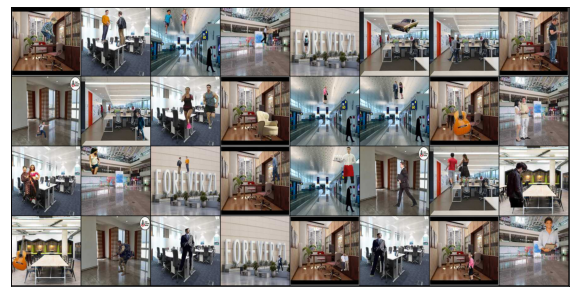

In [8]:
show(sample['fgbg'], nrow=8)

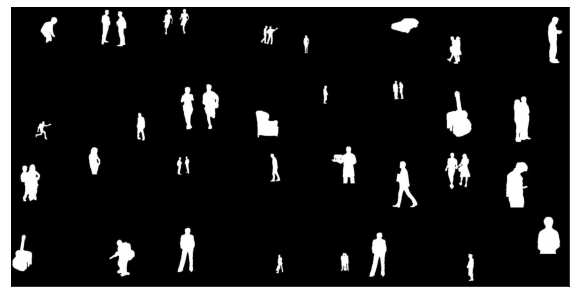

In [9]:
show(sample['mask'],nrow=8)

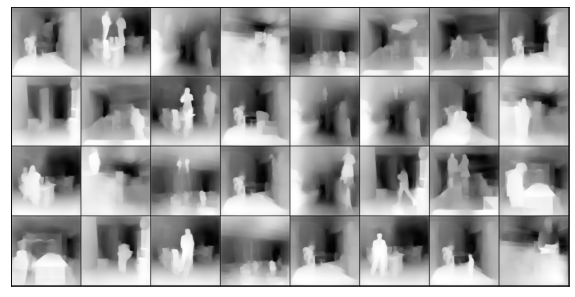

In [10]:
show(sample['depth'],nrow=8)

In [5]:

net = UNet(n_channels=6, n_classes=1, bilinear=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net.to(device=device)


UNet(
  (inc_m): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1_m): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d(32, eps=1e-05, momentu

In [0]:
net =torch.nn.DataParallel(net)
torch.backends.cudnn.benchmark=True
#optimizer = optim.RMSprop(net.parameters(), lr=0.01, weight_decay=1e-8, momentum=0.9) #  
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.95)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.01) #
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=2)
criterion = SSIM(3, reduction = 'mean') #criterion = nn.BCEWithLogitsLoss()

  0%|          | 0/657 [00:00<?, ?it/s]

Epoch:  1


  0%|          | 0/281 [00:00<?, ?it/s]

Time taken for Training 1 epoch is:  0:14:50.277876


100%|██████████| 281/281 [02:09<00:00,  2.16it/s]


Test loss : tensor(0.0074, device='cuda:0')
 Time taken for test  0:02:09.955837
ground truth


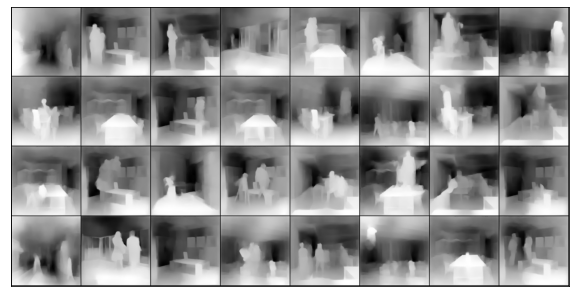

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Depth


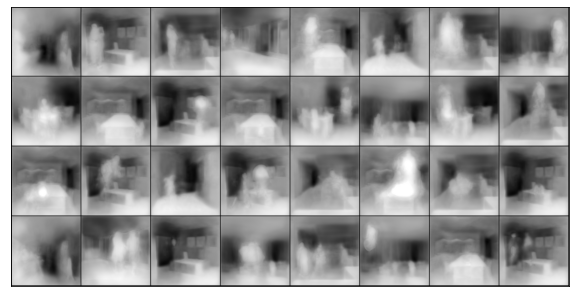

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask


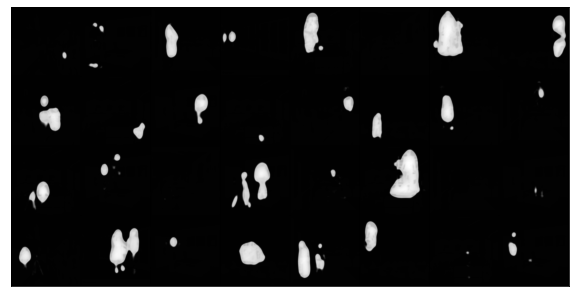

  0%|          | 0/657 [00:00<?, ?it/s]

Epoch:  2


 33%|███▎      | 217/657 [04:50<09:41,  1.32s/it, desc=Training:  Loss : 0.14291822910308838  l1: 0.05350062996149063 l2 = 0.03591696172952652]

In [0]:
EPOCH = 10
# Train
RESUME_TRAINING =False
# if RESUME_TRAINING:
#   print(" Reading previous stored file")
#   try: 
#     net.load_state_dict(torch.load('/content/drive/My Drive/models/CP_epoch.pth', map_location=device))
#   except:
#     pass
for epoch in range(EPOCH):
  print('Epoch: ',epoch+1) 

  train_net(net,device, trainLoader,optimizer,scheduler,criterion)
  test_net(net,device,testLoader,criterion)
  scheduler.step() #loss